# CS20B1044 DIP Assignment 8

Create a concentric square image, with inner square pixel intensity values as 125 and outer square as 0 everywhere. Find the projection along the row, column, diagonal with 45 degree and 135 degree. Reconstruct the image by applying back projection algorithm using the following ways:
1. the row projection only
2. the row and column projections
3. the row and column and diagonal 45-degree projections
4. the row and column and diagonal 45- and 135-degree projections

In [152]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

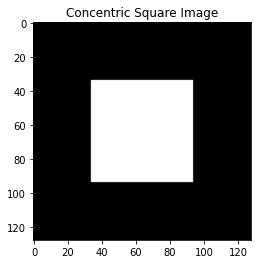

In [153]:
# creating the concentric square image
size = 128

sq_side = 60

# Create a black image with the given size
img = np.zeros((size, size), np.uint8)

# Draw a white square in the centre of the image with the given side
img[size//2-sq_side//2:size//2+sq_side//2, size//2-sq_side//2:size//2+sq_side//2] = 125

# display the image
plt.imshow(img, cmap='gray')
plt.title("Concentric Square Image") 
plt.show()

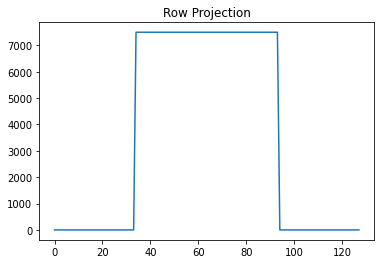

In [154]:
# row projection of the image
row_proj = np.sum(img, axis=1)

# display the row projection 
plt.plot(row_proj)
plt.title("Row Projection")
plt.show()

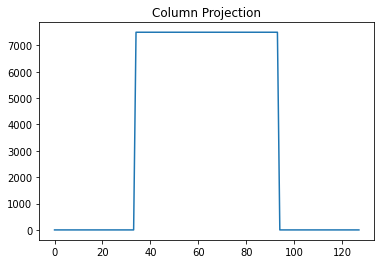

In [155]:
# column projection of the image
col_proj = np.sum(img, axis=0)

# display the column projection
plt.plot(col_proj)
plt.title("Column Projection")
plt.show()

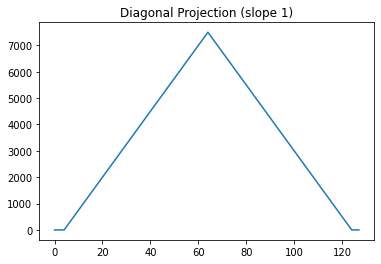

In [156]:
# projection along the diagonal with slope 1 (45 degree)
diag_proj1 = np.zeros(size)

for i in range(size):
    diag_proj1[i] = np.sum(np.diag(img, k=i-size//2))

# display the diagonal projection
plt.plot(diag_proj1)
plt.title("Diagonal Projection (slope 1)")
plt.show()

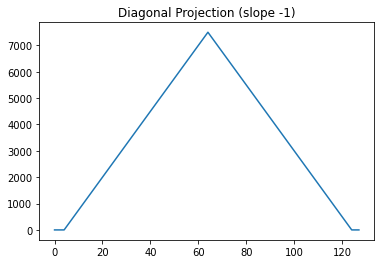

In [157]:
# projection along the diagonal with slope -1 (135 degree)
diag_proj2 = np.zeros(size)

for i in range(size):
    diag_proj2[i] = np.sum(np.diag(img, k=size//2-i))

# display the diagonal projection
plt.plot(diag_proj2)
plt.title("Diagonal Projection (slope -1)")
plt.show()

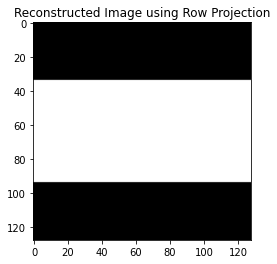

In [158]:
# reconstructing the image by applying back projection algorithm using the row projection only
img_recon1 = np.zeros((size, size), np.uint8)

for i in range(size):
    img_recon1[i,:] = row_proj[i]

# display the reconstructed image
plt.imshow(img_recon1, cmap='gray')
plt.title("Reconstructed Image using Row Projection")
plt.show()

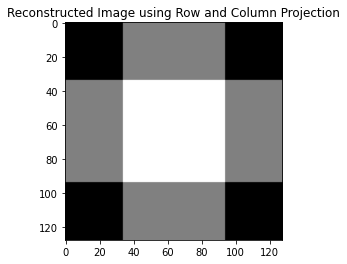

In [159]:
# reconstructing the image by applying back projection algorithm using the row and column projection 
img_recon2 = np.zeros((size, size), np.uint8)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_recon2[i][j] = (row_proj[i] + col_proj[j] )/ 255

# display the reconstructed image
plt.imshow(img_recon2, cmap='gray')
plt.title("Reconstructed Image using Row and Column Projection")
plt.show()

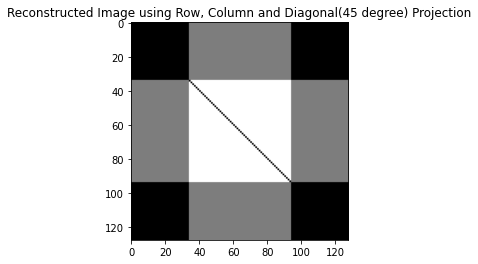

In [160]:
# reconstructing the image by applying back projection algorithm using the row, column and diagonal(45 degree) projection
img_recon3 = np.zeros((size, size), np.uint8)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if i == j:
            img_recon3[i][j] = (diag_proj1[size//2])/ 255
        else:
            img_recon3[i][j] = (row_proj[i] + col_proj[j] + diag_proj1[size//2] )/ 255

# display the reconstructed image
plt.imshow(img_recon3, cmap='gray')
plt.title("Reconstructed Image using Row, Column and Diagonal(45 degree) Projection")
plt.show()

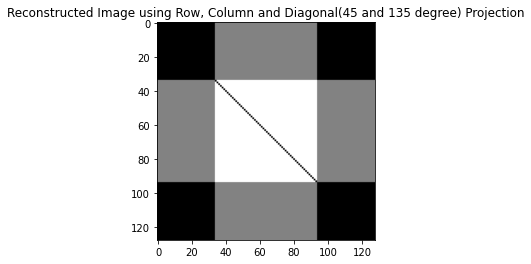

In [161]:
# reconstructing the image by applying back projection algorithm using the row, column and diagonal(45 and 135 degree) projection
img_recon4 = np.zeros((size, size), np.uint8)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if i == j:
            img_recon4[i][j] = (diag_proj1[size//2] + diag_proj2[size//2])/ 255
        else:
            img_recon4[i][j] = (row_proj[i] + col_proj[j] + diag_proj1[size//2] + diag_proj2[size//2] )/ 255

# display the reconstructed image
plt.imshow(img_recon4, cmap='gray')
plt.title("Reconstructed Image using Row, Column and Diagonal(45 and 135 degree) Projection")
plt.show()

## Conclusions:

- The backprojection algorithm works by creating a new image where each pixel's intensity is the sum of its contributions from all the projections that pass through it.

- It is important to balance the number of projections used in the reconstruction process to achieve the best results.
(Less information doesn't give accurate image and more projections leads to overfitting and leads to less accurate image)